                          Dog breed prediction

import the libraries

In [ ]:

# load all required libraries for Dog's Breed Identification Project
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization,Input
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


load the folder from drive

In [ ]:
import zipfile
import os

# Path to ZIP file in Google Drive (update this based on your Drive location)
zip_path = "/content/drive/MyDrive/dog-breed-120 (1).zip"
extract_path = "/content/dog_breeds"  # Extract to Colab storage

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction Complete!")



Extraction Complete!


In [ ]:
import os

dataset_path = extract_path + "/Dogs class"  # Adjust based on the extracted structure

# List dog breed folders
print("Available classes (breeds):", os.listdir(dataset_path))


Available classes (breeds): ['n02104029-kuvasz', 'n02105162-malinois', 'n02112706-Brabancon_griffon', 'n02106382-Bouvier_des_Flandres', 'n02088238-basset', 'n02097298-Scotch_terrier', 'n02111500-Great_Pyrenees', 'n02088632-bluetick', 'n02109525-Saint_Bernard', 'n02095314-wire-haired_fox_terrier', 'n02110958-pug', 'n02112350-keeshond', 'n02111277-Newfoundland', 'n02085620-Chihuahua', 'n02097658-silky_terrier', 'n02099712-Labrador_retriever', 'n02105251-briard', 'n02086910-papillon', 'n02105505-komondor', 'n02112137-chow', 'n02094258-Norwich_terrier', 'n02085936-Maltese_dog', 'n02109047-Great_Dane', 'n02095889-Sealyham_terrier', 'n02093428-American_Staffordshire_terrier', 'n02095570-Lakeland_terrier', 'n02088094-Afghan_hound', 'n02099267-flat-coated_retriever', 'n02110185-Siberian_husky', 'n02105641-Old_English_sheepdog', 'n02106030-collie', 'n02108551-Tibetan_mastiff', 'n02091244-Ibizan_hound', 'n02088364-beagle', 'n02098413-Lhasa', 'n02104365-schipperke', 'n02105412-kelpie', 'n02109961

In [ ]:
import os
import shutil

folder_path = "/content/dog_breeds/Dogs class/Untitled Folder"  # Adjust path

if os.path.exists(folder_path):
    shutil.rmtree(folder_path)  # Deletes the folder and contents
    print("Deleted: Untitled Folder")
else:
    print("Folder not found")


Deleted: Untitled Folder


In [ ]:
import pathlib
data_dir=pathlib.Path(r'/content/dog_breeds/Dogs class')
for folder in data_dir.iterdir():
    if folder.is_dir():
        print(f"{folder.name}: {len(list(folder.glob('*.jpg')))} images")

n02104029-kuvasz: 150 images
n02105162-malinois: 150 images
n02112706-Brabancon_griffon: 153 images
n02106382-Bouvier_des_Flandres: 150 images
n02088238-basset: 175 images
n02097298-Scotch_terrier: 158 images
n02111500-Great_Pyrenees: 213 images
n02088632-bluetick: 171 images
n02109525-Saint_Bernard: 170 images
n02095314-wire-haired_fox_terrier: 157 images
n02110958-pug: 200 images
n02112350-keeshond: 158 images
n02111277-Newfoundland: 195 images
n02085620-Chihuahua: 152 images
n02097658-silky_terrier: 183 images
n02099712-Labrador_retriever: 171 images
n02105251-briard: 152 images
n02086910-papillon: 196 images
n02105505-komondor: 154 images
n02112137-chow: 196 images
n02094258-Norwich_terrier: 185 images
n02085936-Maltese_dog: 252 images
n02109047-Great_Dane: 156 images
n02095889-Sealyham_terrier: 202 images
n02093428-American_Staffordshire_terrier: 164 images
n02095570-Lakeland_terrier: 197 images
n02088094-Afghan_hound: 239 images
n02099267-flat-coated_retriever: 152 images
n021101

In [ ]:

classes = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Number of classes
num_classes = len(classes)
num_classes

120

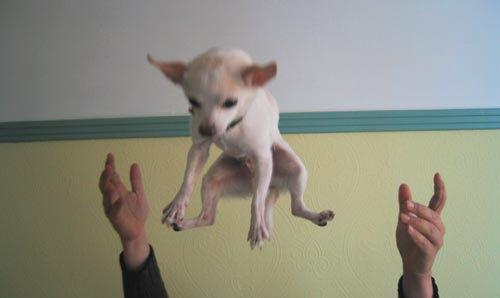

In [ ]:
import PIL
roses=list(data_dir.glob('n02085620-Chihuahua/*'))
PIL.Image.open(str(roses[0]))

In [ ]:
img_height=224
img_width=224  # Resize images
batch_size = 32


split the data

In [ ]:
import tensorflow as tf
train_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.2,
                                                             subset='training',
                                                             seed=123,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size)


Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(data_dir,validation_split=0.2,
                                                             subset='validation',
                                                             seed=123,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size)

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [ ]:
class_names=train_ds.class_names
print(class_names)

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

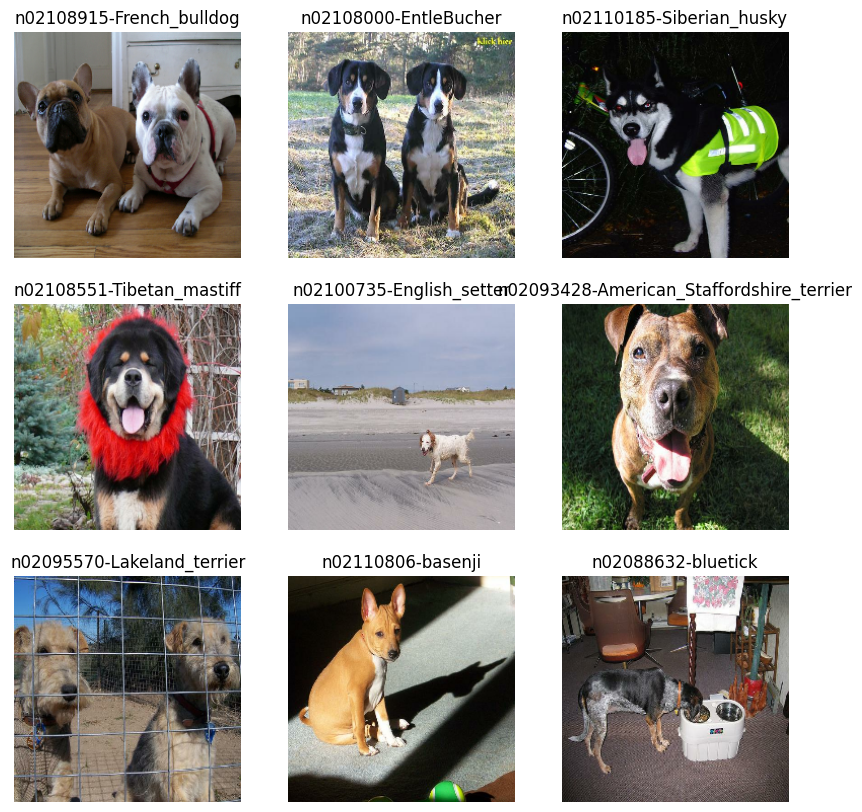

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

develop a cnn model

In [ ]:
num_classes=120
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
model=Sequential([
    layers.Input(shape=(img_height, img_width, 3)),  # Explicit input layer
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 120)                 │          15,480 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,461,720 (24.65 MB)

 Trainable params: 6,461,720 (24.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs=10
history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 43s 71ms/step - accuracy: 0.0127 - loss: 4.7425 - val_accuracy: 0.0316 - val_loss: 4.4695
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 70s 56ms/step - accuracy: 0.0466 - loss: 4.3654 - val_accuracy: 0.0556 - val_loss: 4.3159
Epoch 3/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.1044 - loss: 3.9199 - val_accuracy: 0.0663 - val_loss: 4.4500
Epoch 4/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.2669 - loss: 3.0548 - val_accuracy: 0.0581 - val_loss: 5.9037
Epoch 5/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 46s 66ms/step - accuracy: 0.5340 - loss: 1.8417 - val_accuracy: 0.0547 - val_loss: 8.1269
Epoch 6/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 35s 56ms/step - accuracy: 0.7531 - loss: 0.9226 - val_accuracy: 0.0491 - val_loss: 11.3278
Epoch 7/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.8614 - loss: 0.5213 - val_accuracy: 0.0454 - val_loss: 12.5368
Epoch 8/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 33s 65ms/step - accuracy: 0.9128 - loss: 0.3075 

Text(0.5, 1.0, 'training and validation accuracy')

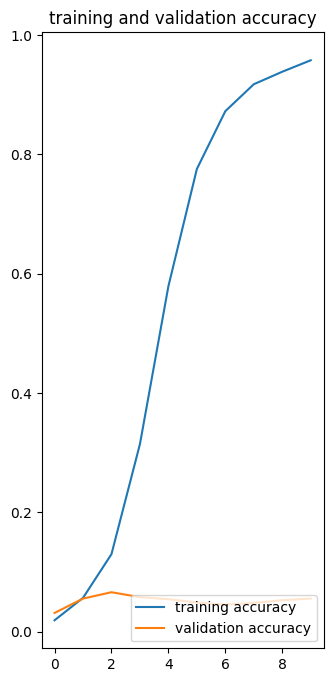

In [ ]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs_range=range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)

plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

The validation accuracy is very low. so made a Resnet50 model.

In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
resnet_model=Sequential()
pretrained_model=tf.keras.applications.ResNet50(include_top=False,
                                                input_shape=(224,224,3),
                                                pooling='avg',classes=120,weights='imagenet')
for layer in pretrained_model.layers:
    layer.trainable=False
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(120,activation='softmax'))

resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
resnet_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 120)                 │          61,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,698,360 (94.22 MB)

 Trainable params: 1,110,648 (4.24 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
epochs=10
history=resnet_model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 124s 222ms/step - accuracy: 0.3196 - loss: 2.9523 - val_accuracy: 0.5491 - val_loss: 1.5491
Epoch 2/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 52s 101ms/step - accuracy: 0.6282 - loss: 1.2521 - val_accuracy: 0.5911 - val_loss: 1.4147
Epoch 3/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.7159 - loss: 0.9384 - val_accuracy: 0.6105 - val_loss: 1.4248
Epoch 4/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.7769 - loss: 0.7024 - val_accuracy: 0.6110 - val_loss: 1.4643
Epoch 5/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 100ms/step - accuracy: 0.8283 - loss: 0.5373 - val_accuracy: 0.6169 - val_loss: 1.4997
Epoch 6/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.8767 - loss: 0.3883 - val_accuracy: 0.6173 - val_loss: 1.6013
Epoch 7/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9161 - loss: 0.2770 - val_accuracy: 0.5943 - val_loss: 1.8270
Epoch 8/10
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 101ms/step - accuracy: 0.9350 - loss: 0

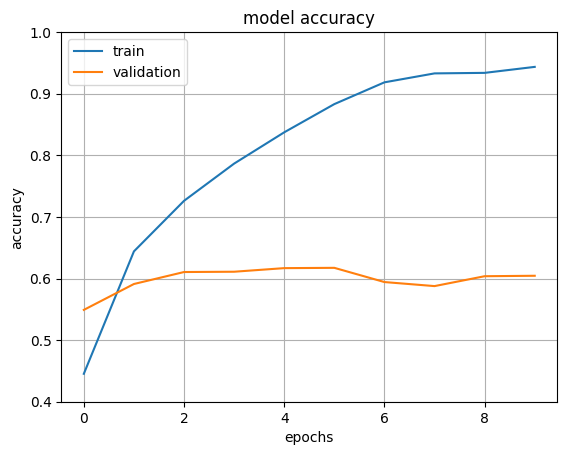

In [ ]:
fig1=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load Pretrained ResNet50 (without Top Layers)
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='avg',
    weights='imagenet'
)

# Fine-Tuning: Unfreeze Last 10 Layers
for layer in pretrained_model.layers[:-10]:
    layer.trainable = False  # Freeze first few layers
for layer in pretrained_model.layers[-10:]:
    layer.trainable = True   # Unfreeze last 10 layers

# Build Model
resnet_model = Sequential([
    pretrained_model,
    Dense(512, activation='relu'),
    Dropout(0.5),  # Reduce overfitting
    Dense(120, activation='softmax')  # 120 classes
])

# Compile Model with Lower Learning Rate for Fine-Tuning
resnet_model.compile(optimizer=Adam(learning_rate=1e-5),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                     metrics=['accuracy'])

# Model Summary
resnet_model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 120)                 │          61,560 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,698,360 (94.22 MB)

 Trainable params: 4,527,224 (17.27 MB)

 Non-trainable params: 20,171,136 (76.95 MB)

In [ ]:
history = resnet_model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.0135 - loss: 5.2195 - val_accuracy: 0.0918 - val_loss: 4.4192
Epoch 2/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 56s 109ms/step - accuracy: 0.0599 - loss: 4.4656 - val_accuracy: 0.2153 - val_loss: 3.8758
Epoch 3/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.1451 - loss: 3.9546 - val_accuracy: 0.3163 - val_loss: 3.2548
Epoch 4/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.2246 - loss: 3.4285 - val_accuracy: 0.3914 - val_loss: 2.7477
Epoch 5/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 56s 108ms/step - accuracy: 0.2921 - loss: 3.0069 - val_accuracy: 0.4558 - val_loss: 2.3970
Epoch 6/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 56s 109ms/step - accuracy: 0.3505 - loss: 2.6881 - val_accuracy: 0.4920 - val_loss: 2.1482
Epoch 7/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.3915 - loss: 2.4715 - val_accuracy: 0.5141 - val_loss: 1.9724
Epoch 8/20
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.4341 - loss: 2

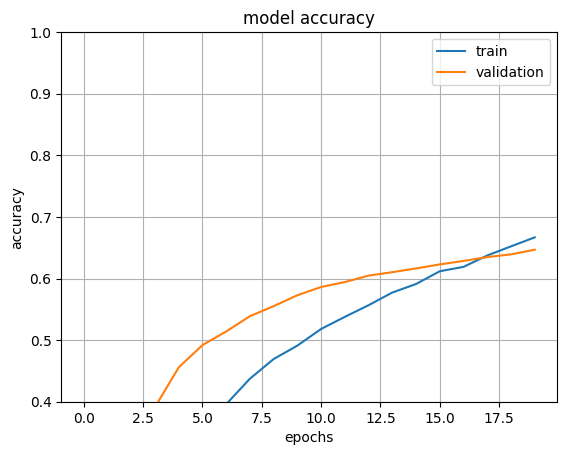

In [ ]:
fig1=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()

shows overfitting so make modifications


In [ ]:
from tensorflow.keras.optimizers import Adam

# Use a slightly higher learning rate
resnet_model.compile(optimizer=Adam(learning_rate=5e-4),
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                     metrics=['accuracy'])

# Train for more epochs
history = resnet_model.fit(train_ds, epochs=30, validation_data=val_ds)


Epoch 1/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 81s 129ms/step - accuracy: 0.4880 - loss: 1.9023 - val_accuracy: 0.5921 - val_loss: 1.4445
Epoch 2/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 56s 110ms/step - accuracy: 0.6341 - loss: 1.2681 - val_accuracy: 0.6149 - val_loss: 1.3928
Epoch 3/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.7239 - loss: 0.9144 - val_accuracy: 0.6319 - val_loss: 1.3670
Epoch 4/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 56s 108ms/step - accuracy: 0.7910 - loss: 0.6693 - val_accuracy: 0.6319 - val_loss: 1.4170
Epoch 5/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 56s 109ms/step - accuracy: 0.8418 - loss: 0.4914 - val_accuracy: 0.6261 - val_loss: 1.4865
Epoch 6/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - accuracy: 0.8758 - loss: 0.3664 - val_accuracy: 0.6164 - val_loss: 1.6480
Epoch 7/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.9059 - loss: 0.2988 - val_accuracy: 0.6365 - val_loss: 1.6692
Epoch 8/30
515/515 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - accuracy: 0.9162 - loss: 0

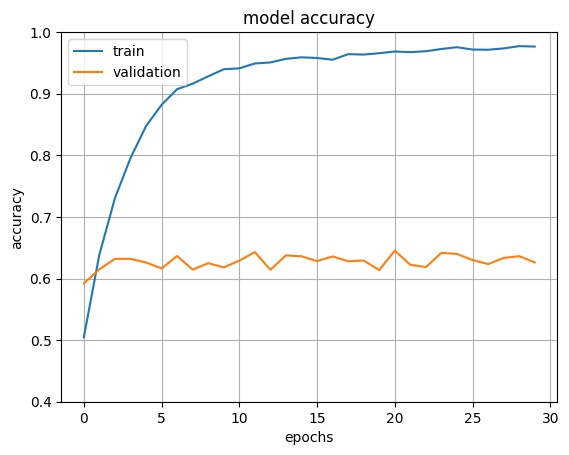

In [ ]:
fig1=plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()

In [ ]:
import cv2
spaniel=list(data_dir.glob('n02085782-Japanese_spaniel/*'))
image=cv2.imread(str(roses[0]))
image_resized=cv2.resize(image,(img_height,img_width))
image_1=np.expand_dims(image_resized,axis=0)

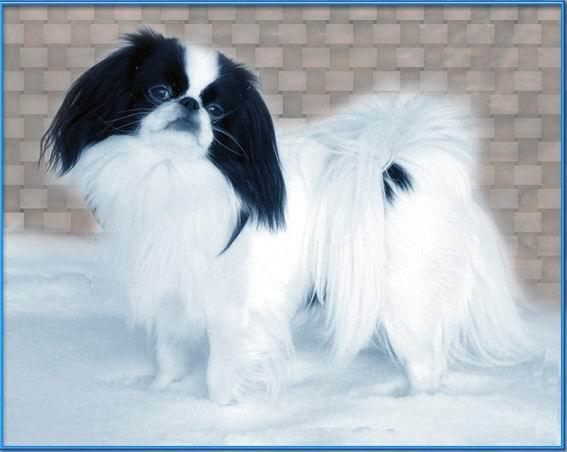

In [ ]:
import PIL
PIL.Image.open(str(spaniel[0]))

In [ ]:
pred_1=resnet_model.predict(image_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [ ]:
output_class=class_names[np.argmax(pred_1)]
print('the predicted class is',output_class)

the predicted class is n02085782-Japanese_spaniel
